# Implementing Gradient descent for linear regression

In [1]:
import numpy as np
import math, copy
%matplotlib widget
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients
np.set_printoptions(legacy='1.25')

In [2]:
xt=np.array([1.0,2.0])
yt=np.array([300.0,500.0])
w=200
b=100
print(f"x_train={xt}")
print(f"y_train={yt}")

x_train=[1. 2.]
y_train=[300. 500.]


Calculating predictor ouput and cost functon

In [3]:
def compute_cost_fun(x,y,w,b):
    m=x.shape[0]
    Jwb_i=0
    for i in range(m):
         fwb=w*x[i]+b
         Jwb_i=Jwb_i+(fwb-y[i])**2
    Jwb=(1/(2*m))*(Jwb_i) 
    return Jwb        

In [4]:
w=200
b=100
Jwb=compute_cost_fun(xt,yt,w,b)
Jwb

0.0

Calculating gradient descent and cost function for one iteration

In [5]:
def compute_grad(x,y,w,b):
    m=x.shape[0]
    dw_i=0
    db_i=0
    new_w=0
    new_b=0
    a=1
    for i in range(m):
         fwb=w*x[i]+b
         dw_i=dw_i+((fwb-y[i])*x[i])
         db_i=db_i+(fwb-y[i])
    dw=dw_i/m
    db=db_i/m
    new_w=new_w-a*dw
    new_b=new_b-a*db
    Jwb=compute_cost_fun(xt,yt,new_w,new_b)
    return dw,db,Jwb  

In [6]:

w=300.0
b=100.0
[wc,bc,Jwb]=compute_grad(xt, yt, w, b)
print(f"Updated w:{wc},Updated b:{bc}")
print(f"Cost: {Jwb}")

Updated w:250.0,Updated b:150.0
Cost: 453125.0


Cost function after multiple iterations

In [7]:
def cost_fun_final(x,y,w_in,b_in,it,a):
    m=x.shape[0]
    costf=[]
    wb=[]
    for j in range (it):
        dw_i=0
        db_i=0
        for i in range(m):
                fwb=w_in*x[i]+b_in
                dw_i=dw_i+((fwb-y[i])*x[i])
                db_i=db_i+(fwb-y[i])
        dw=dw_i/m
        db=db_i/m 

        w_in=w_in-a*dw
        b_in=b_in-a*db
        Jwb=compute_cost_fun(xt,yt,w_in,b_in)   

        if j<100000:   
            wb.append([w_in,b_in])
            costf.append(Jwb)
        if j% math.ceil(it/10)==0:
            print(f"Iteration {j:4}: Cost {costf[-1]:.2e} ",
                  f"dw: {dw: 0.3e}, db: {db: 0.3e}  ",
                  f"w: {w_in: 0.3e}, b:{b_in: 0.5e}")
    
       
    return w_in,b_in,wb,costf

In [8]:
w_in=0
b_in=0
it=10000
a=1.0e-2
[w_val,b_val,wb,costf]=cost_fun_final(xt,yt,w_in,b_in,it,a)
print(f"(w,b) found by gradient descent: ({w_val:8.4f},{b_val:8.4f},{costf[-1]:.2e})")
print(f"w={w_val:.3f}")
print(f"b={b_val:.3f}")
print(f"cost={costf[-1]:.3e}")
#print(w_val)

Iteration    0: Cost 7.93e+04  dw: -6.500e+02, db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00  dw: -3.712e-01, db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01  dw: -1.789e-01, db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01  dw: -8.625e-02, db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02  dw: -4.158e-02, db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03  dw: -2.004e-02, db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03  dw: -9.660e-03, db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04  dw: -4.657e-03, db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04  dw: -2.245e-03, db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05  dw: -1.082e-03, db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02
(w,b) found by gradient descent: (199.9929,100.0116,6.75e-06

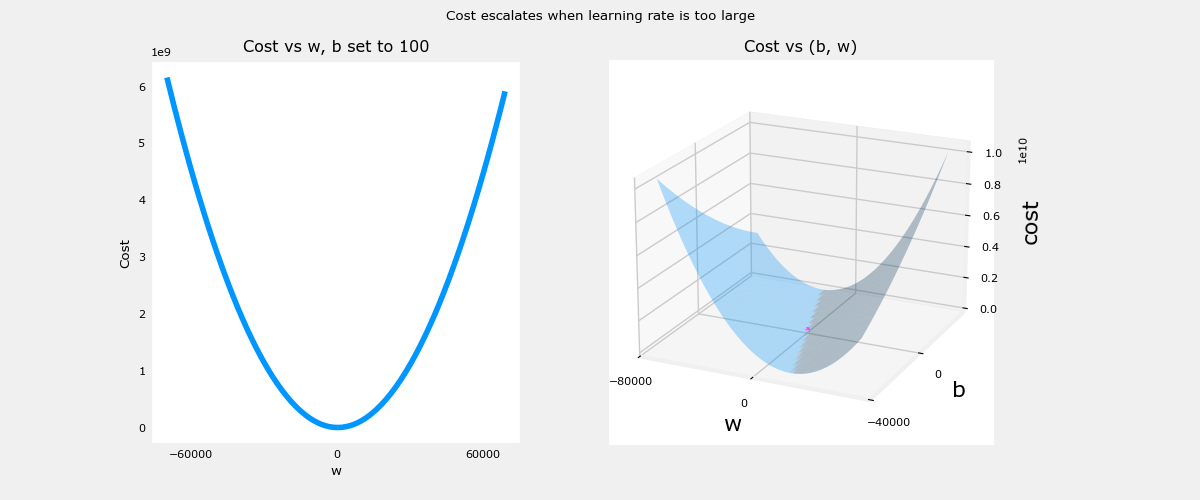

In [9]:
#Plot divergence
plt_divergence(wb, costf,xt, yt)
plt.show()

Iteration vs cost

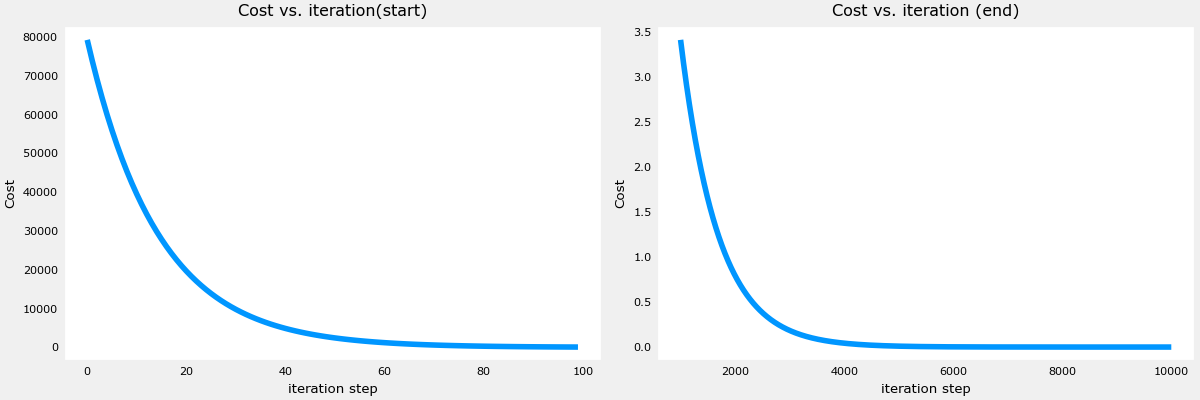

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(costf[:100])
ax2.plot(1000 + np.arange(len(costf[1000:])), costf[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

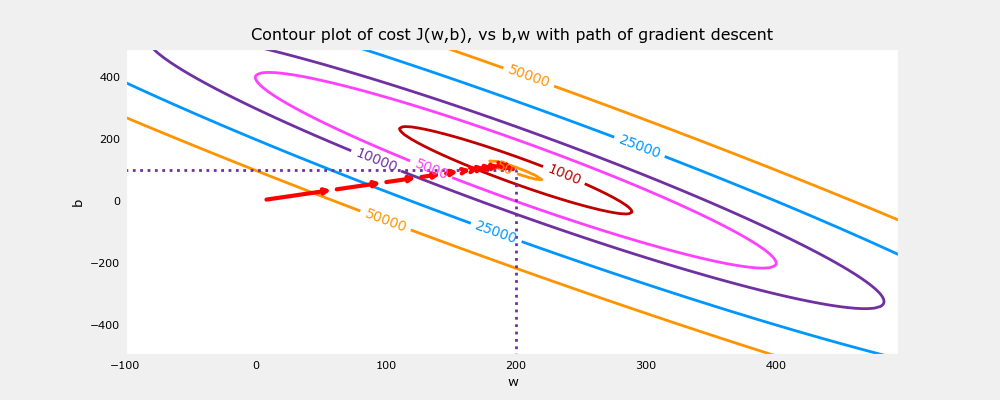

In [11]:
fig, ax = plt.subplots(1,1, figsize=(10, 4))
plt_contour_wgrad(xt, yt, wb, ax)

For different number of iterations and alpha value

Iteration    0: Cost 2.58e+05  dw: -6.500e+02, db: -4.000e+02   w:  5.200e+02, b: 3.20000e+02
Iteration    1: Cost 7.82e+05  dw:  1.130e+03, db:  7.000e+02   w: -3.840e+02, b:-2.40000e+02
Iteration    2: Cost 2.37e+06  dw: -1.970e+03, db: -1.216e+03   w:  1.192e+03, b: 7.32800e+02
Iteration    3: Cost 7.19e+06  dw:  3.429e+03, db:  2.121e+03   w: -1.551e+03, b:-9.63840e+02
Iteration    4: Cost 2.18e+07  dw: -5.974e+03, db: -3.691e+03   w:  3.228e+03, b: 1.98886e+03
Iteration    5: Cost 6.62e+07  dw:  1.040e+04, db:  6.431e+03   w: -5.095e+03, b:-3.15579e+03
Iteration    6: Cost 2.01e+08  dw: -1.812e+04, db: -1.120e+04   w:  9.402e+03, b: 5.80237e+03
Iteration    7: Cost 6.09e+08  dw:  3.156e+04, db:  1.950e+04   w: -1.584e+04, b:-9.80139e+03
Iteration    8: Cost 1.85e+09  dw: -5.496e+04, db: -3.397e+04   w:  2.813e+04, b: 1.73730e+04
Iteration    9: Cost 5.60e+09  dw:  9.572e+04, db:  5.916e+04   w: -4.845e+04, b:-2.99567e+04
(w,b) found by gradient descent: (-48453.6513,-29956.6715,5.

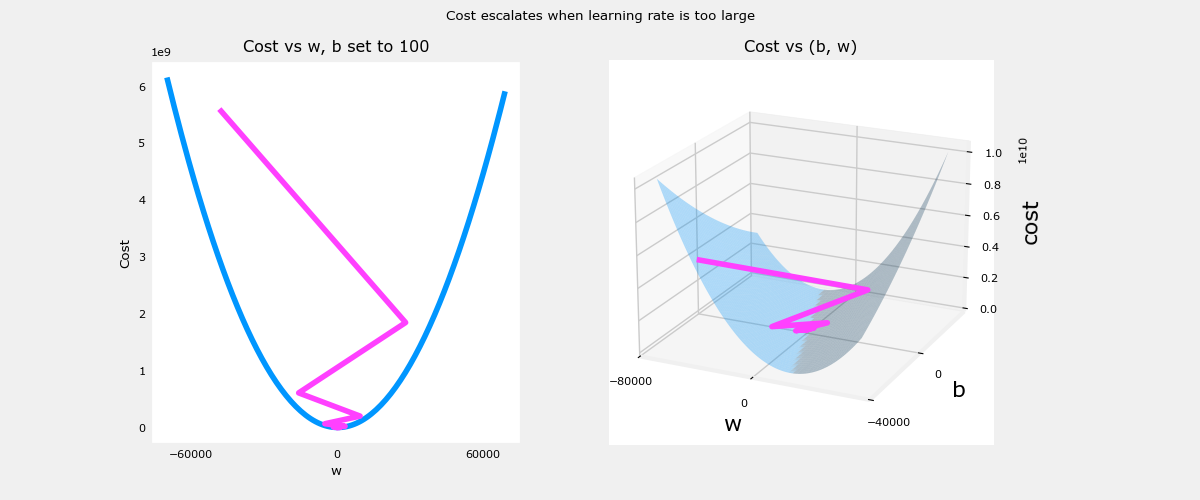

In [12]:
w_in=0
b_in=0
it=10
a=8.0e-1
[w_val,b_val,wb,costf]=cost_fun_final(xt,yt,w_in,b_in,it,a)
print(f"(w,b) found by gradient descent: ({w_val:8.4f},{b_val:8.4f},{costf[-1]:.2e})")
#Plot divergence
plt_divergence(wb, costf,xt, yt)
plt.show()